Import libraries 

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.image as pltimg
from scipy.sparse import csr_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

Read dataframe and saying the first column should be used as index and that ISO-8859 is the code for the language

In [90]:
df = pd.read_csv("E_Commerce_data.csv", index_col=0, encoding='ISO-8859-1')

In [91]:
print(df)

          StockCode                          Description  Quantity  \
InvoiceNo                                                            
536365       85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
536365        71053                  WHITE METAL LANTERN         6   
536365       84406B       CREAM CUPID HEARTS COAT HANGER         8   
536365       84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
536365       84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...             ...                                  ...       ...   
581587        22613          PACK OF 20 SPACEBOY NAPKINS        12   
581587        22899         CHILDREN'S APRON DOLLY GIRL          6   
581587        23254        CHILDRENS CUTLERY DOLLY GIRL          4   
581587        23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
581587        22138        BAKING SET 9 PIECE RETROSPOT          3   

                InvoiceDate  UnitPrice  CustomerID         Country  
InvoiceNo           

Here we can see that InvoiceNo is being used as index and we also gonna change the countries to numbers

In [92]:
df.head()   

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceNo,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom


First we gonna convert Country to numerical
then we gonna remove 'InvoiceNo' as index

To convert we gonna get all countries with no duplicates as we don't want the same country twice

In [93]:
df["Country"].unique() #Getting all the countries with no duplicates

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

Then we gonna give an number for each country starting with 0

In [94]:
d = {'United Kingdom': 0, 'France': 1, 'Australia': 2, 'Netherlands' : 3, 'Germany' : 4,
       'Norway' : 5, 'EIRE' : 6, 'Switzerland' : 7, 'Spain' :8 , 'Poland' : 9, 'Portugal' : 10,
       'Italy' : 11, 'Belgium' : 12, 'Lithuania' : 13, 'Japan' : 14, 'Iceland' : 15,
       'Channel Islands' : 16, 'Denmark' : 17, 'Cyprus' : 18, 'Sweden' : 19, 'Austria' : 20,
       'Israel' : 21, 'Finland' : 22, 'Greece' : 23, 'Singapore' : 24, 'Lebanon' : 25,
       'United Arab Emirates' : 26, 'Saudi Arabia' : 27, 'Czech Republic' : 28, 'Canada' : 29,
       'Unspecified' : 30, 'Brazil' : 31, 'USA' : 32, 'European Community' : 33, 'Bahrain' : 34,
       'Malta' : 35, 'RSA' : 36}
df['Country'] = df['Country'].map(d) 
#converting countries to numerical using map()

In [95]:
df['Country'].unique() #here we can see that all countries are numerical but still having NaN values

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 34., 23., nan,
       24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 35., 36.])

Now we gonna drop the InvoiceNo

In [96]:
df = df.reset_index(drop=True) #to remove InvoiceNo as index
df.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,0.0
1,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,0.0
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,0.0
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,0.0
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,0.0


Here we can see that this is a huge dataframe

In [97]:
df.shape #How many rowls and columns 

(541909, 7)

Checking missing values

In [98]:
df.isna().sum() #show missing values

StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country           288
dtype: int64

<AxesSubplot:>

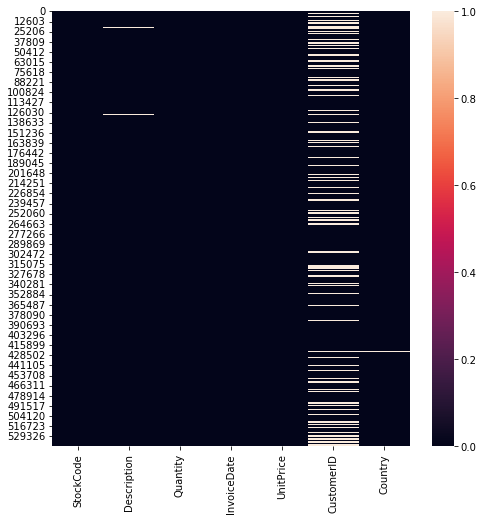

In [99]:
#Plotting the heatmap for missing values 
missing_values = df.isnull()
plt.figure(figsize=(8,8))
sns.heatmap(missing_values)

Drop missing values

In [100]:
df = df.dropna() #remove these missing values + new shape
df.shape

(406829, 7)

In [101]:
df.isna().sum() #no missing values

StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

<AxesSubplot:>

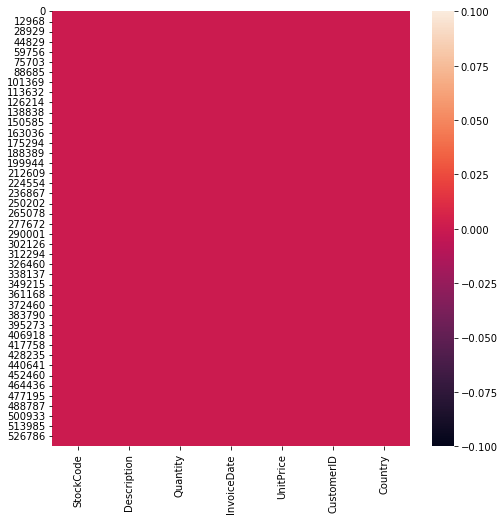

In [102]:
#Plotting the heatmap for missing values after clean it
missing_values = df.isnull()
plt.figure(figsize=(8,8))
sns.heatmap(missing_values)

In [103]:
df.isnull().values.any() # no null values

False

We already have a smaller dataframe

In [104]:
df.shape

(406829, 7)

Here I'm removing duplicates

In [105]:
df.drop_duplicates() #remove duplicates

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,0.0
1,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,0.0
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,0.0
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,0.0
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,0.0
...,...,...,...,...,...,...,...
541904,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,1.0
541905,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,1.0
541906,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,1.0
541907,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,1.0


In [106]:
df.shape #here we can see we droped 5265 duplicated values

(406829, 7)

In [107]:
df.dtypes

StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country        float64
dtype: object

In [108]:
df.describe() 

,Quantity,UnitPrice,CustomerID,Country
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,0.764034
std,248.693370,69.315162,1713.600303,3.046465
min,-80995.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13953.000000,0.000000
50%,5.000000,1.950000,15152.000000,0.000000
75%,12.000000,3.750000,16791.000000,0.000000
max,80995.000000,38970.000000,18287.000000,36.000000


Here we can visualise the number of transactions per country

C:\Users\fafam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


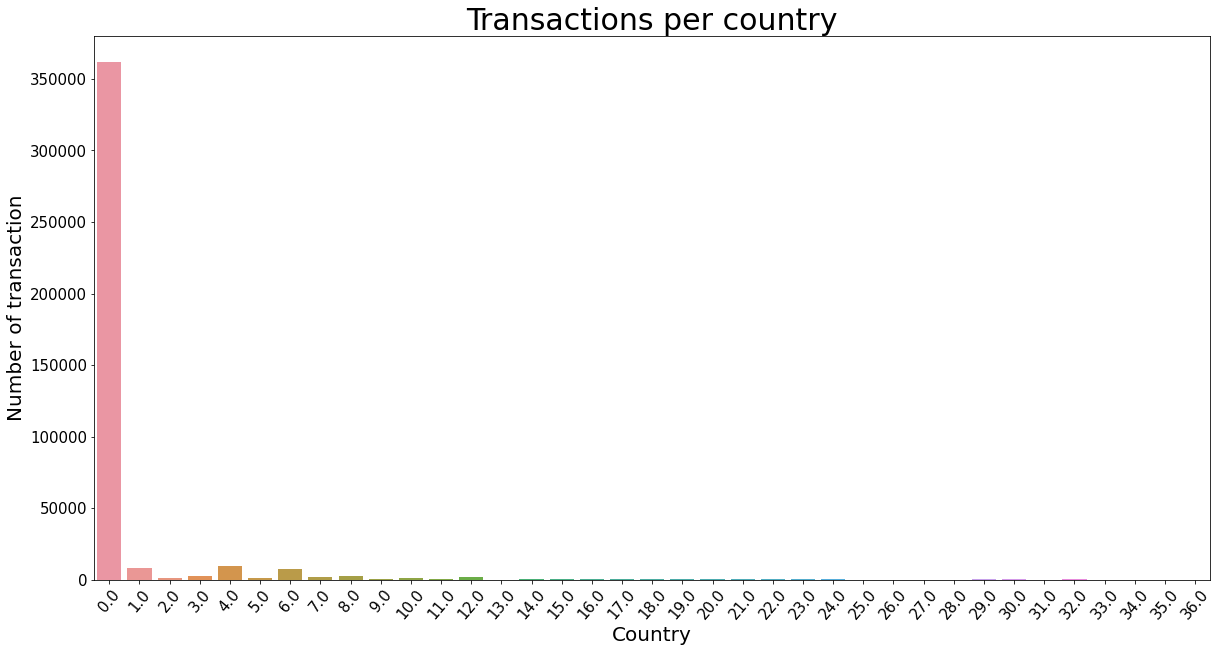

In [109]:
country_counts = df['Country'].value_counts()
fig, axes = plt.subplots(figsize=(20,10))
sns.barplot(country_counts.index, country_counts.values)

axes.set_xlabel('Country', size=20)
axes.set_ylabel('Number of transaction', size=20)
axes.set_title('Transactions per country', size=30)
plt.xticks(rotation=50) #to see better
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

In [110]:
print(df)

       StockCode                          Description  Quantity  \
0         85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1          71053                  WHITE METAL LANTERN         6   
2         84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...                                  ...       ...   
541904     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908     22138        BAKING SET 9 PIECE RETROSPOT          3   

             InvoiceDate  UnitPrice  CustomerID  Country  
0       12/01/2010 08:26       2.55     17850.0      0.0  
1       12/01/2010 08:26       3.39     17850.0      0.0  
2       12/01/2010

# DECISION TREE CLASSIFICATION

now I'm gonna drop columns that won't make any difference on my analysis as the stock code, the description, the invoice date and the customer ID, making my dataframe way simple to analyse

In [163]:

df = df.drop(columns=['StockCode', 'Description', 'InvoiceDate', 'CustomerID'])

KeyError: "['StockCode', 'Description', 'InvoiceDate', 'CustomerID'] not found in axis"

In [112]:
df.head() #now with less information we have a clear dataframe

,Quantity,UnitPrice,Country
0,6,2.55,0.0
1,6,3.39,0.0
2,8,2.75,0.0
3,6,3.39,0.0
4,6,3.39,0.0


In [113]:
df.shape

(406829, 3)

as I'm not interested in items which were not sold, I'm gonna drop the rowns with 0 quantities 


In [114]:
df = df[df['Quantity'] >= 0] 
df.head()

,Quantity,UnitPrice,Country
0,6,2.55,0.0
1,6,3.39,0.0
2,8,2.75,0.0
3,6,3.39,0.0
4,6,3.39,0.0


In [115]:
df.shape #minus 8.905 items 

(397924, 3)

In [138]:
df.dtypes

Quantity       int64
UnitPrice    float64
Country      float64
dtype: object

to reduce the usage of memory I'm gonna change the type of data, it will keep representing the data but in a much smaller memory usage

In [ ]:
df['Quantity'] = df['Quantity'].astype('int8')
df['UnitPrice'] = df['UnitPrice'].astype('float16')
df['Country'] = df['Country'].astype('float16')


In [140]:
df.dtypes

Quantity        int8
UnitPrice    float16
Country      float16
dtype: object

In [153]:
df.shape #here we can see that the size of out dataframe still the same

(397924, 3)

# DECISION TREE
It is an effective and easy-to-understand machine learning technique for classification and regression issues. Both categorical and continuous input data may be handled by decision trees, and they can reflect complicated decision boundaries.

here I choose my features and my X and Y
I also used encoder = OneHotEncoder() to make sure all variables will be numerical

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = [ 'UnitPrice', 'Quantity'] #the features I'll use

X = df[features].values
y = df['Country'].values

encoder = OneHotEncoder() #make sure all variable will be numerical features


Here we slip the dataframe in two sets (training and testing)
I'm gonna use 1% of the original data for the training because my laptop wasn't working properly to hold more data for the training.
What I would recommend is use about 0.2 or 0.3 (80/70% for training)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.99, random_state = 0)

Here we are normalising the variety of X_train and X_test

In [143]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
print("Xtrain",X_train)
print("Xtest",X_test)

Xtrain [[-0.5024 -0.4204]
 [-0.609   0.1451]
 [ 0.509  -0.4204]
 ...
 [-0.4036  0.8237]
 [-0.2308 -0.2507]
 [-0.6406  0.032 ]]
Xtest [[-0.04587 -0.4863 ]
 [-0.1216   0.931  ]
 [-0.1021   1.345  ]
 ...
 [ 0.4338  -0.4863 ]
 [ 0.1862  -0.4272 ]
 [-0.0841  -0.4863 ]]


Here I'm creating a decision tree model and sending it to the training data

In [144]:
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0) 
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

the confusion matrix will evaluate the performance of a classification model, so it will compare the predicted values from y_pred to the real values from y_test

In [145]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[345555    476   1628 ...      0      0      0]
 [  8137     16     47 ...      0      0      0]
 [  1105     19      4 ...      0      0      0]
 ...
 [    17      0      0 ...      0      0      0]
 [   108      0      1 ...      0      0      0]
 [    58      0      0 ...      0      0      0]]


Here we are visualising the training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

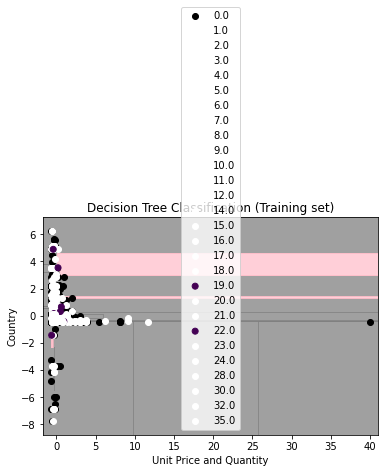

In [146]:

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('grey', 'pink')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('black', 'white'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Unit Price and Quantity')
plt.ylabel('Country')
plt.legend()
plt.show()

And here are the test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

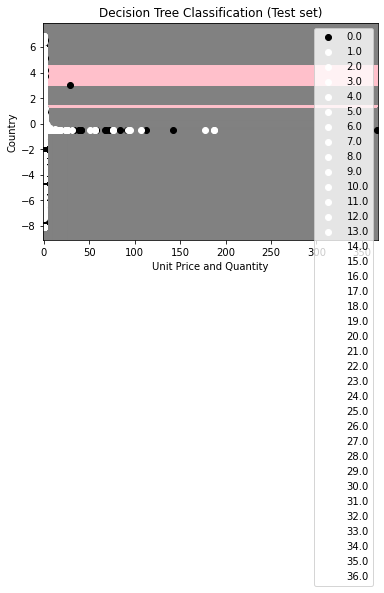

In [147]:

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.99, cmap = ListedColormap(('grey', 'pink')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('black', 'white'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Unit Price and Quantity')
plt.ylabel('Country')
plt.legend()
plt.show()

In [148]:
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt = accuracy_score(y_test, y_pred_dt)

print("DTREE Accuracy:", dt)

DTREE Accuracy: 0.886400385840663


# KNN
It is an easy approach that can be applied to both binary and multiclass classification issues and does not rely on any presumptions regarding the distribution of the underlying data.


Same as before I choose my features and my X and Y I also used encoder = OneHotEncoder() to make sure all variables will be numerical

In [156]:
features = [ 'UnitPrice', 'Quantity']

X = df[features].values
y = df['Country'].values
y = pd.get_dummies(y, drop_first=True) 

encoder = OneHotEncoder()


In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


Creating KNN classifier and training it using the training set

In [158]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean')

to predict the class labels of a new set of test data

In [159]:
y_pred = knn.predict(X_test) 


The accuracy score is used to assess how well the KNN classifier performed using the test data.

In [160]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.8908760408115398


to identify the k value that provides the highest accuracy throughout the training and test datasets as the optimum value.

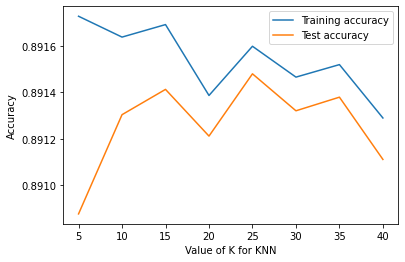

In [162]:
k_values = [1, 2, 3, 4, 5, 6, 7, 8]

train_scores = []
test_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

import matplotlib.pyplot as plt

plt.plot(k_values, train_scores, label='Training accuracy')
plt.plot(k_values, test_scores, label='Test accuracy')
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [166]:

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)

print("KNN Accuracy:", knn_score)

KNN Accuracy: 0.8913618924760006
